In [1]:
from langchain_core.prompts import PromptTemplate
from pydantic import BaseModel, Field
from langchain_core.output_parsers import PydanticOutputParser, JsonOutputParser
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from langgraph.graph import MessagesState, StateGraph, START, END
from typing import TypedDict, Annotated, List
from langchain_core.messages import HumanMessage, AIMessage
import operator
import os

load_dotenv(override=True)

True

In [65]:
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash", temperature=0.)

In [3]:
jobRole = "Data Scientist"
resume_string = """
ketan.kishore31@gmail.c  om  +91 7488391342  House No. 4098, Sector   –  4/F, Bokaro Steel City,  Jharkhand   -   827004  EDUCATION  10th from Delhi Public  School, Bokaro Steel City,  Jharkhand in 2010 with  95% GPA  12 th   from Delhi Public  School, Bokaro Steel City,  Jharkhand in 2013 with  82% GPA  B .Tech. in Electronics and  Communication from SRM  University, Chennai in 2017  with 76.85 GPA  M.Tech in Data Science and  Engineering from BITS   -  Work Integrated, 2023 with  7.27 CGPA  Ketan Kishore  An enthusiastic & high energy driven professional ,   targeting challenging assignments as a   Data  Scientist   with an organization of high repute .  GitHub Repo:   https://github.com/ketankishore27  Docker Hub Repo:   https://hub.docker.com/u/ketankishore27  LinkedIn :   https://www.linkedin.com/in/ketan - kishore - b89643150/  PROFILE SUMMARY  •   Goal - oriented professional with experience in   Insurance ,   Banking , and   Telecom   domains.  •   Skilled in   Predictive Modeling   using   Supervised   and   Unsupervised   Learning  •   E xperienced in   Text   Analytics   using   NLP , LLM   and   Generative AI  •   Exposure   to   Cloud services like   AWS   and   Azure  •   Proficient   in working with   Distributed Framework   for   scalable   Analytics and Modelling  PROJECTS  T - Systems India Pvt Ltd   Apr’21   –   Present  Client:   Deutsche Telekom (Germany)  Common Service Desk   (Generative AI)  •   Partnered with stakeholders to define clear project goals and success criteria .  •   Designed and implemented backend models for service desk   support   using RASA and RAG .  •   Fine - tuned model responses to enhance accuracy and   user experience .  •   Created   APIs   for real - time AI model integration .  •   Analysis for incorrect responses from the chatbot.  Client:   Deutsche   Telekom   ( Germany,   Croatia , Hungary , Poland )  Router Domain   (Machine Learning, Big Data)  •   Feature store for telecom data .  •   Developed   models to predict   issues   like   Device, I nstallation , Line, Wi - Fi   error etc.  •   D ashboards   for the bootstrapped new router   developed by   organization .  •   Created flows to   troubleshoot and find new issues in new router versions.  •   Developed customer profiling and journey analysis for people visiting our app.  •   Helped in   finding out issues in the Deutsche Telecom `My Magenta` app  Bajaj Finance   Jun ’ 20   –   Apr’21  Client: Loans /Lending   Team  Money Manager   (Machine Learning)  •   Created ML model to   classify   transactional message   and store entities  •   Assisting   in creating real time offer generation pipeline based on above extracted entities  Client: E - Store   Team  Nearest Dealer Solution   (Machine Learning)  •   Created a   ML model to identify   nearest dealers   for   visitors   on the website.  •   Incorporated business rules to recommend dealers based on loyalty, reviews/score and distance  Client: Marketing   + Cards Team  Clickstream Analytics   (Adobe Analytics, Big Data)  •   Created reports on   Adobe Analytics   on Customer Journey, Path, Churn and Anomaly  •   A nalyze and   r ecommend concordan t /discordan t   simulations sent to the identified visitors
PERSONAL DETAILS  Date of Birth: 20 th   February 1995  Lan guages Known: English and Hindi  HOBBIES  •   Travel  •   Cook  •   Gym  •   Personal Projects ( Here )  •   Friends Catchup  Capgemini.   Oct ’ 17   -   Jun ’20  Client:   Swiss Re  Trip Optimization   -   POC (Tableau, Statistical Modelling)  •   Developed a constrained   algorithm   to optimize trip allocation   cost .  •   Implemented hierarchical de - allocation of trips consi dering corporate band and real time  Tableau frontend filters  •   Created and presented   dashboard having   Drill Down Reports   and overall summary  Client:   Sunlife Financials  News - Feed   –   POC   (N atural   L anguage   P rocessing , Web Scraping)  •   Developed a web crawler   to search   the web   and perform NLP task to create insights.  •   Worked   on possibility to use   satellite imagery to predict Catastrophes damage index .  Client:   Assurant Employee Benefits  Analytics   and Automation   (Python, Basic Machine Learning)  •   Analyze ,   Visualize,   and deduce KPI based on claims distributed over geographical area.  •   Implemented ML and DL model to predict   Fraudulent/Incorrect C laims  •   Work ed   parallel   on   development of   Churn Model   ( POC ).  •   Created   Python API’s and Selenium automations
"""

In [69]:
def get_other_comments():

    class other_feedbacks(BaseModel):
        
        headings_feedback: str = Field("Feedback text for the Section Headings")
        title_match: str = Field("Feedback text for the Job Title Match")
        formatting_feedback: str = Field("Feedback text for the Data Formatting")
        

    output_parser = PydanticOutputParser(pydantic_object=other_feedbacks).get_format_instructions()
        
    instruction_format = """
    You are a professional resume reviewer.
    
    Your task is to analyze the resume and provide concise, aspect-wise feedback across the following three dimensions:
    
    ---
    
    ### Aspects to Evaluate:
    
    1. **Section Headings**  
       - Are all key sections present (e.g., Summary, Experience, Education, Skills)?
       - Are headings clearly labeled and easy to identify?
    
    2. **Job Title Match**  
       - Does the resume include job titles that closely match or are relevant to the target job role?
       - Are these titles prominently placed and easy to interpret?
    
    3. **Data Formatting**  
       - Is the content consistently formatted?
       - Are bullet points, spacing, dates, and alignment professional and easy to scan?
    
    ---
    
    ### Inputs:
    **Job Role**: {job_role}  
    **Resume Text**:  
    {resume_text}
    
    ---
    
    ### Output Instructions:
    
    - For each aspect, provide a **short, crisp feedback (1–2 lines)**
    - Focus the feedback on **relevance to the job role**, clarity, and professionalism
    - Do **not** include scores or overall evaluation
    
    ---
    
    ### Output Format (JSON):
    {output_format}
    """

    prompt_template = PromptTemplate.from_template(template=instruction_format,
                                                   partial_variables={"output_format": output_parser})

    chain = prompt_template | llm | JsonOutputParser()

    return chain

In [70]:
other_comment_chain = get_other_comments()

In [72]:
other_comment_chain.invoke({"resume_text": resume_string, "job_role": jobRole})

{'headings_feedback': "The 'PROJECTS' heading is used for work experience, and a dedicated 'Skills' section is missing, impacting clarity and professional structure.",
 'title_match': 'The resume clearly targets a Data Scientist role, but actual job titles for past work experiences are entirely absent, making it hard to gauge direct relevance and seniority.',
 'formatting_feedback': "Formatting is inconsistent, with jumbled contact information and the inclusion of less professional sections like 'Personal Details' and 'Hobbies', affecting overall scanability."}

In [66]:
def get_custom_scores():

    class custom_scores(BaseModel):
        searchibility_score: int = Field("How well the resume is optimized for ATS systems and keyword-rich")
        hard_skills_score: int = Field("Relevance and presence of technical/domain-specific skills")
        soft_skill_score: int = Field("Presence of communication, leadership, teamwork, adaptability, etc.")
        formatting_score: int = Field("Visual clarity, structure, readability, and professional layout")

    output_parser = PydanticOutputParser(pydantic_object=custom_scores).get_format_instructions()
    
    instructions_format = """
    You are a professional resume reviewer.
    
    Your task is to evaluate a resume's suitability for a specific job role by scoring it across four aspects:
    
    ---
    
    ### Aspects to Evaluate:
    
    1. **Searchability**  
       - How well the resume is optimized for ATS systems and keyword-rich
    
    2. **Hard Skills**  
       - Relevance and presence of technical/domain-specific skills
    
    3. **Soft Skills**  
       - Presence of communication, leadership, teamwork, adaptability, etc.
    
    4. **Formatting**  
       - Visual clarity, structure, readability, and professional layout
    
    ---
    
    **Job Role**: {job_role}  
    **Resume Text**:  
    {resume_text}
    
    ---
    
    ### Scoring Instructions:
    
    - Assign a score between **0 and 100** for each aspect
    - Do **not** include comments, explanations, labels, or overall score
    - Return output strictly in the following JSON format
    
    ---
    
    ### Output Format (JSON):
    {output_format}
    """

    prompt_instruction = PromptTemplate.from_template(template=instructions_format, 
                                                      partial_variables={"output_format": output_parser})

    chain = prompt_instruction | llm | JsonOutputParser()

    return chain

In [67]:
custom_score_chain = get_custom_scores()

In [68]:
custom_score_chain.invoke({"resume_text": resume_string, "job_role": jobRole})

{'searchibility_score': 90,
 'hard_skills_score': 95,
 'soft_skill_score': 65,
 'formatting_score': 55}

In [58]:
def get_summary_overview():

    class summary_score_extractor(BaseModel):

        score: int = Field("Score of the resume based on Summary Section Analysis, an Applicant Tracking System would give.")
        color: str = Field("`'green'` if score is above 80, `orange` if the score is between 40 and 80 and `red` if the score is less than 40")
        label: str = Field("`'good'` if score is above 80, `warning` if the score is between 40 and 80 and `critical` if the score is less than 40")
        comment: str = Field("A brief justification of the score awarded")

    output_parser = PydanticOutputParser(pydantic_object = summary_score_extractor).get_format_instructions()
    
    instruction_format = """
    You are an expert resume evaluator.

    Your task is to analyze the **Summary section** of a resume and score it based on how well it aligns with a specific job role.
    - Clarity and conciseness
    - Relevance to job roles
    - Use of strong, action-oriented language
    - Mention of key skills and experience
    - Overall professionalism and tone
    
    ---

    **Job Role**: {job_role}  
    **Resume Summary**:
    {resume}
    
    ---
    
    ### Evaluation Logic:
    
    1. If the summary is **missing, empty, or irrelevant**, return:
       - score: any value below 40 (e.g. 20)
       - label: `"critical"`
       - color: `"red"`
       - comment: `"No summary section was provided in the resume."` or equivalent
    
    2. Otherwise:
       - Evaluate the summary and assign a **score from 0–100**
       - Based on the score, assign:
         - score < 40 → `"critical"` + `"red"`
         - 40 ≤ score ≤ 80 → `"warning"` + `"orange"`
         - score > 80 → `"good"` + `"green"`
       - Add a comment explaining the rating in 1–3 lines
    
    ---
    
    ### Output Format (JSON):
    {output_information}
    
    """

    prompt_template = PromptTemplate.from_template(template = instruction_format, 
                                                   partial_variables={"output_information": output_parser})

    chain = prompt_template | llm | JsonOutputParser()

    return chain

In [59]:
summary_extractor_chain = get_summary_overview()

In [60]:
summary_extractor_chain.invoke({"resume": resume_string, "job_role": "Data Scientist"})

{'score': 88,
 'color': 'green',
 'label': 'good',
 'comment': 'The summary is highly effective, clearly listing key data science skills like Predictive Modeling, NLP, and Generative AI. It strongly aligns with the role by mentioning relevant cloud (AWS, Azure) and domain experience. The language could be more action-oriented to better showcase impact.'}

In [48]:
def get_contact_information():

    class contact_extractor(BaseModel):

        color: str = Field("`'green'` if both mobile number and email id are present, otherwise `'red'`")
        comment: str = Field("What is missing in the resume, mobile number or email? If both are present, return a positive message")
        email_id: str = Field("Extracted email id, If Email id is not present, then return blank space")
        mobile_number: str = Field("Extracted mobile number, If mobile number is not present, then return blank space")

    output_parser = PydanticOutputParser(pydantic_object = contact_extractor).get_format_instructions()
    
    instruction_format = """
    You are a resume analysis assistant.
    
    Your task is to analyze the following resume text and determine whether it contains:
    
    1. A valid **email address**
    2. A valid **phone number** (contact number or mobile number)
    
    Then return:
    
    - The **email ID**, if found
    - The **phone number**, if found
    - A **color**: `"green"` if both are present, otherwise `"red"`
    - A **comment** explaining what's present or missing
    
    ---
    
    ### Input Resume:
    {resume_text}
    
    ---
    
    ### Output Rules:
    - If **both email and phone number are present**, return:
      - color: `"green"`
      - comment: `"Both contact number and email ID are present."`
    
    - If **either or both are missing**, return:
      - color: `"red"`
      - comment: clearly specify what’s missing, e.g. `"Email ID is missing."`, `"Phone number is missing."`, or `"Both are missing."`
    
    - If either email or phone number is not found, return `null` for that field.
    
    ---
    
    ### Output Format (JSON):
    {output_information}
    
    """

    prompt_template = PromptTemplate.from_template(template = instruction_format, 
                                                   partial_variables={"output_information": output_parser})

    chain = prompt_template | llm | JsonOutputParser()

    return chain

In [49]:
contact_extractor_chain = get_contact_information()

In [50]:
result = contact_extractor_chain.invoke({"resume_text": resume_string})

In [51]:
result

{'color': 'green',
 'comment': 'Both contact number and email ID are present.',
 'email_id': 'ketan.kishore31@gmail.com',
 'mobile_number': '+917488391342'}

In [4]:
def create_resume_score():

    class ResumeScore(BaseModel):
    
        score: int = Field("Overall score of the resume, an Applicant Tracking System would give to the resume.")
        items: list[str] = Field("Pointwise suggestions for improvement in the resume.", min_items=1, max_items=7)

    output_format = PydanticOutputParser(pydantic_object = ResumeScore).get_format_instructions()
    
    instruction_prompt = """
    You are an expert resume reviewer and hiring manager with over 10 years of experience screening candidates for technical and non-technical roles.

    Your task is to evaluate the quality of a candidate’s resume in relation to a specific job role (provided below). You must provide:
    
    ---
    
    1. **Overall Resume Score (0–100)**  
       - Base this on clarity, relevance to the role, formatting, structure, language, and completeness.
    
    2. **Improvement Suggestions**  
       - Give **clear, constructive, and non-repetitive tips** to improve the resume.
       - Give a **maximum of 10** tips. If the resume is already strong, return **fewer or none**.
       - Do **not invent flaws** — if something is already good, **don’t suggest unnecessary changes**.
       - Focus on things like formatting clarity, missing metrics, vague descriptions, inconsistent verb tenses, or irrelevant content.
       - Summarize all the suggestions in well under 7 points.
       
    ---
    
    ### Evaluation Criteria:
    - Relevance to the target job
    - Clear, concise, and action-oriented language
    - Use of measurable achievements
    - Logical structure and consistent formatting
    - Grammar, tone, and professionalism
    
    ---
    
    ### Input:
    **Target Job Title**: {jobRole}
    **Candidate Resume**:
    {resume}
    
    {format_instructions}
    """

    scoring_prompt = PromptTemplate.from_template(template=instruction_prompt, 
                                              partial_variables = {"format_instructions": output_format})

    chain = scoring_prompt | llm
    
    return chain

In [5]:
scoring_chain = create_resume_score()

In [6]:
def create_response_rewriter():

    class ResumeScore(BaseModel):
    
        score: int = Field("Overall score of the resume, an Applicant Tracking System would give to the resume.")
        items: list[str] = Field("Pointwise suggestions for improvement in the resume.", min_items=1, max_items=7)

    output_format = PydanticOutputParser(pydantic_object = ResumeScore).get_format_instructions()
    
    instruction_prompt = """
    You are an intelligent assistant that generates structured responses in a strict schema.

    The previous response you generated **did not match the required schema**.
    
    Your task now is to regenerate the response using the original intent, but this time it must conform **exactly** to the schema provided below.
    
    ---
    
    ### ❌ Previous Invalid Response:
    {invalid_response}
    
    ---
    
    ### ✅ Required Response Schema:
    {expected_schema}
    
    ---
    
    ### 🎯 Instructions:
    - Regenerate the response in the **exact format defined by the schema**.
    - Do **not explain** anything.
    - Do **not add any extra text** before or after.
    - If the previous response was already close, just **fix the structure**.
    - Ensure **valid JSON** or structured output depending on the schema.
    
    ---
    
    ### 🔁 New Response:
    """

    restructure_prompt = PromptTemplate.from_template(template=instruction_prompt, 
                                              partial_variables = {"expected_schema": output_format})

    chain = restructure_prompt | llm
    
    return chain

In [7]:
rewriter_chain = create_response_rewriter()

In [15]:
class customMessageState(TypedDict):

    resumeString: str
    initial_response: str
    final_response: dict
    jobRole: str
    repeat: int = 0
    scratchpad: Annotated[List[HumanMessage | AIMessage], operator.add]

In [22]:
def node_resume_scores(state: customMessageState):
    
    resumeText = state['resumeString']
    jobRole = state['jobRole']
    response = scoring_chain.invoke({"resume": resumeText, "jobRole": jobRole})
    
    try:
        parser = JsonOutputParser()
        formatted_response = parser.parse(response.content)
        if isinstance(formatted_response, dict):
            if isinstance(formatted_response['score'], int) and isinstance(formatted_response['items'], List):
                return {'initial_response': formatted_response, 'scratchpad': [formatted_response], 'repeat': 0, 'final_response': formatted_response}
    except:    
        pass

    return {'initial_response': response, 'scratchpad': [response], 'repeat': 0}

In [43]:
def validate_schema(state: customMessageState):

    repeat_mode = state['repeat']
    if state.get("final_response", None):
        return "END"

    if repeat_mode < 5:
        return "Rephrase"
    else:
        return "END"

In [44]:
def restructure_response(state: customMessageState):

    repetition = state['repeat']
    response = state['scratchpad'][-1]
    output = rewriter_chain.invoke({"invalid_response": response})

    try:
        parser = JsonOutputParser()
        formatted_response = parser.parse(output)

        if isinstance(formatted_resposne, dict):
            if isinstance(formatted_resposne['score'], int) and isinstance(formatted_resposne['items'], list):
                return {'repeat': repetition+1, 'final_response': formatted_response}

    except Exception as e:
        pass
        
    return {'repeat': repetition+1, 'scratchpad': [output]}

In [45]:
graph = StateGraph(customMessageState)
graph.add_node("resume_scores", node_resume_scores)
graph.add_node("schema_rewriter", restructure_response)
graph.add_edge(START, "resume_scores")
graph.add_conditional_edges("resume_scores", validate_schema, 
                           {
                               "END": END, 
                               "Rephrase": "schema_rewriter"
                           })
graph.add_conditional_edges("schema_rewriter", validate_schema, 
                           {
                               "END": END, 
                               "Rephrase": "schema_rewriter"
                           })

In [46]:
compiledGraph = graph.compile()

In [47]:
result = compiledGraph.invoke({"resumeString": resume_string, "jobRole": jobRole})

In [28]:
compiledGraph

ValueError: Failed to reach https://mermaid.ink/ API while trying to render your graph after 1 retries. To resolve this issue:
1. Check your internet connection and try again
2. Try with higher retry settings: `draw_mermaid_png(..., max_retries=5, retry_delay=2.0)`
3. Use the Pyppeteer rendering method which will render your graph locally in a browser: `draw_mermaid_png(..., draw_method=MermaidDrawMethod.PYPPETEER)`

In Resume Score dict_keys(['resumeString', 'jobRole', 'scratchpad'])


KeyError: "Input to PromptTemplate is missing variables {'jobRole'}.  Expected: ['jobRole', 'resume'] Received: ['resume', 'job_role']\nNote: if you intended {jobRole} to be part of the string and not a variable, please escape it with double curly braces like: '{{jobRole}}'.\nFor troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_PROMPT_INPUT "

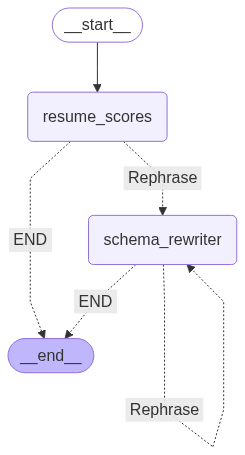

In [34]:
compiledGraph

In [33]:
result

NameError: name 'result' is not defined

In [21]:
invalid_response = """score 65,
  items 'Quantify your achievements with metrics. Instead of describing tasks (e.g., "Fine-tuned model responses"), state the impact (e.g., "Improved chatbot response accuracy by 20% by implementing a RAG framework"). This is the most critical improvement needed.'
   'Adopt a standard, single-column resume format. The current two-column layout is broken, causing formatting errors (e.g., "gmail.c om", "B .Tech.") and making the resume difficult to read for both humans and applicant tracking systems (ATS).'
   'Strengthen your bullet points by using more powerful action verbs and focusing on outcomes. Replace vague phrases like "Helped in finding out issues" with specific accomplishments like "Identified 15+ critical bugs, leading to a 10% reduction in customer support tickets."'
   'Rename the main "PROJECTS" section to "PROFESSIONAL EXPERIENCE". The current title is confusing because it lists your employment history, not just standalone projects.'
   'Streamline the Education section by removing your 10th and 12th-grade results. For an experienced professional, only university-level degrees are relevant.'
   'Remove the "PERSONAL DETAILS" and "HOBBIES" sections. Information like your date of birth is unnecessary and can introduce bias. Hobbies like "Friends Catchup" are unprofessional. Use the space to elaborate on your project impacts.'
   'Refine your professional summary. The current one is generic. Start with a stronger statement that highlights your years of experience and key specializations, e.g., "Data Scientist with 5+ years of experience specializing in Generative AI and predictive modeling for the telecom and finance industries."
   """


#sample_result = rewriter_chain.invoke({"invalid_response": invalid_response})

In [54]:
result

{'resumeString': '\nketan.kishore31@gmail.c  om  +91 7488391342  House No. 4098, Sector   –  4/F, Bokaro Steel City,  Jharkhand   -   827004  EDUCATION  10th from Delhi Public  School, Bokaro Steel City,  Jharkhand in 2010 with  95% GPA  12 th   from Delhi Public  School, Bokaro Steel City,  Jharkhand in 2013 with  82% GPA  B .Tech. in Electronics and  Communication from SRM  University, Chennai in 2017  with 76.85 GPA  M.Tech in Data Science and  Engineering from BITS   -  Work Integrated, 2023 with  7.27 CGPA  Ketan Kishore  An enthusiastic & high energy driven professional ,   targeting challenging assignments as a   Data  Scientist   with an organization of high repute .  GitHub Repo:   https://github.com/ketankishore27  Docker Hub Repo:   https://hub.docker.com/u/ketankishore27  LinkedIn :   https://www.linkedin.com/in/ketan - kishore - b89643150/  PROFILE SUMMARY  •   Goal - oriented professional with experience in   Insurance ,   Banking , and   Telecom   domains.  •   Skilled i

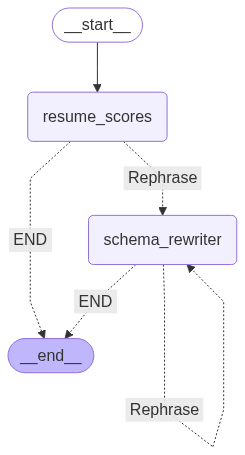

In [42]:
#compiledGraph

In [43]:
#compiledGraph.invoke({"resume": resume_string, "job_role": jobRole})

dict_keys(['resumeString', 'initial_response', 'jobRole', 'scratchpad'])


KeyError: 'repeat'

In [ ]:
result['initial_response']

In [ ]:
result.keys()

In [64]:
node_resume_scores(resumeText = resume_string, jobRole = jobRole)

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised InternalServerError: 500 An internal error has occurred. Please retry or report in https://developers.generativeai.google/guide/troubleshooting.


{'score': 65,
 'items': ['Quantify your achievements with metrics. Instead of describing tasks (e.g., "Fine-tuned model responses"), state the impact (e.g., "Improved chatbot response accuracy by 20% by implementing a RAG framework"). This is the most critical improvement needed.',
  'Adopt a standard, single-column resume format. The current two-column layout is broken, causing formatting errors (e.g., "gmail.c om", "B .Tech.") and making the resume difficult to read for both humans and applicant tracking systems (ATS).',
  'Strengthen your bullet points by using more powerful action verbs and focusing on outcomes. Replace vague phrases like "Helped in finding out issues" with specific accomplishments like "Identified 15+ critical bugs, leading to a 10% reduction in customer support tickets."',
  'Rename the main "PROJECTS" section to "PROFESSIONAL EXPERIENCE". The current title is confusing because it lists your employment history, not just standalone projects.',
  'Streamline the Ed

In [4]:
class ResumeScore(BaseModel):

    score: int = Field("Overall score of the resume, an Applicant Tracking System would give to the resume.")

In [5]:
output_format = PydanticOutputParser(pydantic_object = ResumeScore).get_format_instructions()

In [63]:
jobRole = "Data Scientist"
resume_string = """
ketan.kishore31@gmail.c  om  +91 7488391342  House No. 4098, Sector   –  4/F, Bokaro Steel City,  Jharkhand   -   827004  EDUCATION  10th from Delhi Public  School, Bokaro Steel City,  Jharkhand in 2010 with  95% GPA  12 th   from Delhi Public  School, Bokaro Steel City,  Jharkhand in 2013 with  82% GPA  B .Tech. in Electronics and  Communication from SRM  University, Chennai in 2017  with 76.85 GPA  M.Tech in Data Science and  Engineering from BITS   -  Work Integrated, 2023 with  7.27 CGPA  Ketan Kishore  An enthusiastic & high energy driven professional ,   targeting challenging assignments as a   Data  Scientist   with an organization of high repute .  GitHub Repo:   https://github.com/ketankishore27  Docker Hub Repo:   https://hub.docker.com/u/ketankishore27  LinkedIn :   https://www.linkedin.com/in/ketan - kishore - b89643150/  PROFILE SUMMARY  •   Goal - oriented professional with experience in   Insurance ,   Banking , and   Telecom   domains.  •   Skilled in   Predictive Modeling   using   Supervised   and   Unsupervised   Learning  •   E xperienced in   Text   Analytics   using   NLP , LLM   and   Generative AI  •   Exposure   to   Cloud services like   AWS   and   Azure  •   Proficient   in working with   Distributed Framework   for   scalable   Analytics and Modelling  PROJECTS  T - Systems India Pvt Ltd   Apr’21   –   Present  Client:   Deutsche Telekom (Germany)  Common Service Desk   (Generative AI)  •   Partnered with stakeholders to define clear project goals and success criteria .  •   Designed and implemented backend models for service desk   support   using RASA and RAG .  •   Fine - tuned model responses to enhance accuracy and   user experience .  •   Created   APIs   for real - time AI model integration .  •   Analysis for incorrect responses from the chatbot.  Client:   Deutsche   Telekom   ( Germany,   Croatia , Hungary , Poland )  Router Domain   (Machine Learning, Big Data)  •   Feature store for telecom data .  •   Developed   models to predict   issues   like   Device, I nstallation , Line, Wi - Fi   error etc.  •   D ashboards   for the bootstrapped new router   developed by   organization .  •   Created flows to   troubleshoot and find new issues in new router versions.  •   Developed customer profiling and journey analysis for people visiting our app.  •   Helped in   finding out issues in the Deutsche Telecom `My Magenta` app  Bajaj Finance   Jun ’ 20   –   Apr’21  Client: Loans /Lending   Team  Money Manager   (Machine Learning)  •   Created ML model to   classify   transactional message   and store entities  •   Assisting   in creating real time offer generation pipeline based on above extracted entities  Client: E - Store   Team  Nearest Dealer Solution   (Machine Learning)  •   Created a   ML model to identify   nearest dealers   for   visitors   on the website.  •   Incorporated business rules to recommend dealers based on loyalty, reviews/score and distance  Client: Marketing   + Cards Team  Clickstream Analytics   (Adobe Analytics, Big Data)  •   Created reports on   Adobe Analytics   on Customer Journey, Path, Churn and Anomaly  •   A nalyze and   r ecommend concordan t /discordan t   simulations sent to the identified visitors
PERSONAL DETAILS  Date of Birth: 20 th   February 1995  Lan guages Known: English and Hindi  HOBBIES  •   Travel  •   Cook  •   Gym  •   Personal Projects ( Here )  •   Friends Catchup  Capgemini.   Oct ’ 17   -   Jun ’20  Client:   Swiss Re  Trip Optimization   -   POC (Tableau, Statistical Modelling)  •   Developed a constrained   algorithm   to optimize trip allocation   cost .  •   Implemented hierarchical de - allocation of trips consi dering corporate band and real time  Tableau frontend filters  •   Created and presented   dashboard having   Drill Down Reports   and overall summary  Client:   Sunlife Financials  News - Feed   –   POC   (N atural   L anguage   P rocessing , Web Scraping)  •   Developed a web crawler   to search   the web   and perform NLP task to create insights.  •   Worked   on possibility to use   satellite imagery to predict Catastrophes damage index .  Client:   Assurant Employee Benefits  Analytics   and Automation   (Python, Basic Machine Learning)  •   Analyze ,   Visualize,   and deduce KPI based on claims distributed over geographical area.  •   Implemented ML and DL model to predict   Fraudulent/Incorrect C laims  •   Work ed   parallel   on   development of   Churn Model   ( POC ).  •   Created   Python API’s and Selenium automations
"""

instruction_prompt = """
You are a hiring manager and resume reviewer with 10+ years of experience in talent acquisition and human resource management.

Your task is to critically evaluate a candidate's resume and provide the following outputs:

1. **Score (out of 100)** — based on overall quality, clarity, relevance, structure.

---

### Evaluation Criteria:
- Clarity and conciseness of content
- Structure and formatting
- Use of metrics and accomplishments
- Language quality (grammar, tone, consistency)

---

**Candidate Resume**:
{resume}

{format_instructions}
"""

In [36]:
scoring_prompt = PromptTemplate.from_template(template=instruction_prompt, 
                                              partial_variables = {"format_instructions": output_format})

In [40]:
chain = scoring_prompt | llm | JsonOutputParser()

In [41]:
result = chain.invoke({"resume": resume_string})

In [42]:
result

{'score': 58}